## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
!pip install keras.preprocessing.image


ERROR: Could not find a version that satisfies the requirement keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for keras.preprocessing.image


In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_path = "/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/train"
val_path = "/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/val"
test_path = "/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/test"

In [ ]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Assumed dataset paths (adjust these based on your directory structure)
train_path = "/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/train"
val_path = "/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/val"
test_path = "/content/drive/My Drive/Colab Notebooks/Cats_and_Dogs/test"

# Image dimensions
img_width, img_height, channels = 150, 150, 3
input_shape = (img_width, img_height, channels)

# Data generators
datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4800s 15s/step - accuracy: 0.5981 - loss: 0.6532 - val_accuracy: 0.7341 - val_loss: 0.5222
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 136s 354ms/step - accuracy: 0.7492 - loss: 0.5180 - val_accuracy: 0.7627 - val_loss: 0.4781
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 343ms/step - accuracy: 0.7838 - loss: 0.4660 - val_accuracy: 0.7912 - val_loss: 0.4534
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 348ms/step - accuracy: 0.8114 - loss: 0.4186 - val_accuracy: 0.8028 - val_loss: 0.4140
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 341ms/step - accuracy: 0.8375 - loss: 0.3697 - val_accuracy: 0.8237 - val_loss: 0.4045
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 344ms/step - accuracy: 0.8602 - loss: 0.3297 - val_accuracy: 0.8133 - val_loss: 0.4248
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 344ms/step - accuracy: 0.8715 - loss: 0.2958 - val_accuracy: 0.8249 - val_loss: 0.3884
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 347ms/step - accuracy: 0.9022 - 

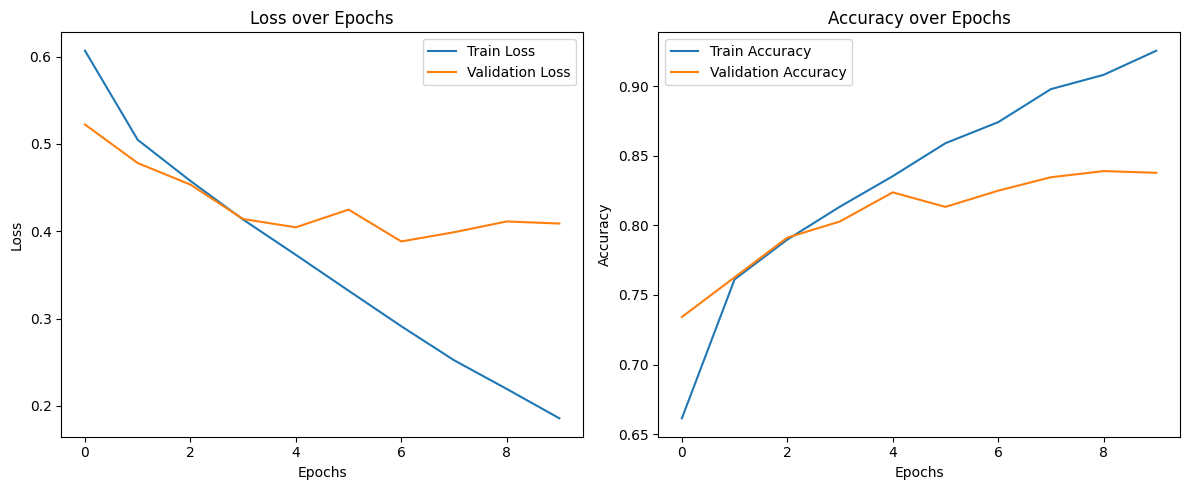

In [ ]:
# CNN Architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with multiprocessing
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    workers=4,  # Number of workers to load data in parallel
    use_multiprocessing=True,  # Enable multiprocessing for data loading
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
# Image dimensions
img_width, img_height, channels = 100, 100, 3
input_shape = (img_width, img_height, channels)

# Data generators
datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [5]:
from keras.applications import VGG16
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Load pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Build model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=3, # takes too much time otherwise
    validation_data=val_generator,
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 3231s 5s/step - accuracy: 0.6684 - loss: 0.6651 - val_accuracy: 0.8651 - val_loss: 0.3339
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 200ms/step - accuracy: 0.7626 - loss: 0.4520 - val_accuracy: 0.8426 - val_loss: 0.3437
79/79 ━━━━━━━━━━━━━━━━━━━━ 477s 6s/step - accuracy: 0.8626 - loss: 0.3240
Test Accuracy: 0.86


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.7024 - loss: 1.7919 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 9868s 16s/step - accuracy: 0.7025 - loss: 1.7902 - val_accuracy: 0.8655 - val_loss: 0.2816
79/79 ━━━━━━━━━━━━━━━━━━━━ 1224s 16s/step - accuracy: 0.8750 - loss: 0.2846
Test Accuracy (Xception): 0.86


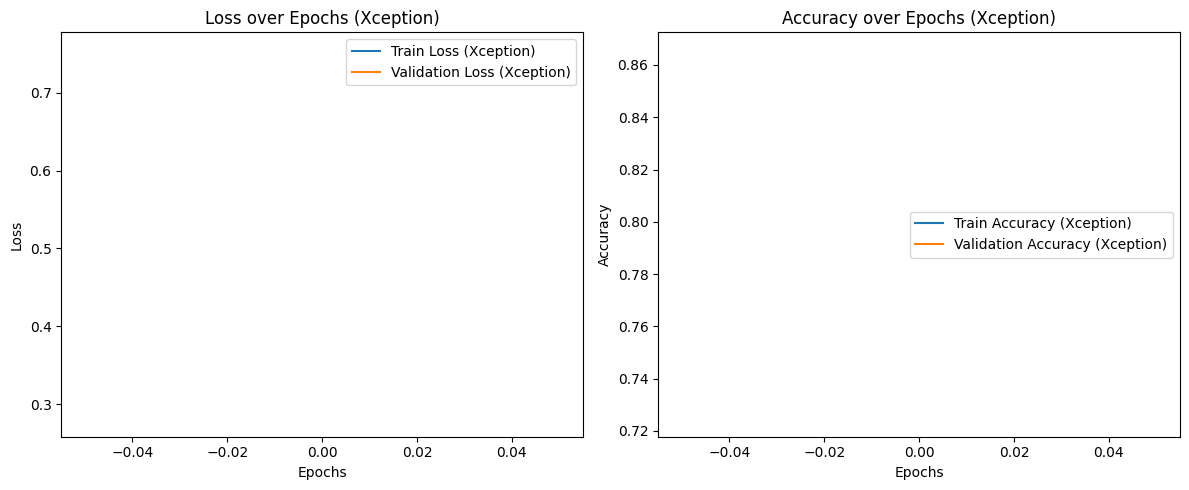

In [9]:
from tensorflow.keras.applications import Xception

# Load Xception model without top layer
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, channels))

# Freeze the layers of the pre-trained model
for layer in base_model_xception.layers:
    layer.trainable = False

x = base_model_xception.output
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model_xception = Model(inputs=base_model_xception.input, outputs=output)

model_xception.compile(optimizer=Adam(learning_rate=0.01),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


history_xception = model_xception.fit(
    train_generator,
    epochs=1,
    validation_data=val_generator,
    verbose=1
)


test_loss_xception, test_accuracy_xception = model_xception.evaluate(test_generator)
print(f"Test Accuracy (Xception): {test_accuracy_xception:.2f}")

plt.figure(figsize=(12, 5))

# loss
plt.subplot(1, 2, 1)
plt.plot(history_xception.history['loss'], label='Train Loss (Xception)')
plt.plot(history_xception.history['val_loss'], label='Validation Loss (Xception)')
plt.title('Loss over Epochs (Xception)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history_xception.history['accuracy'], label='Train Accuracy (Xception)')
plt.plot(history_xception.history['val_accuracy'], label='Validation Accuracy (Xception)')
plt.title('Accuracy over Epochs (Xception)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The image is classified as: Cat


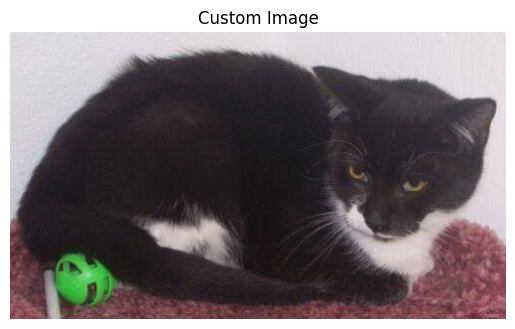

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

custom_image_path = '/content/drive/MyDrive/Colab Notebooks/Cats_and_Dogs/val/cats/cat.11250.jpg'

def preprocess_image(image_path, target_size=(100, 100)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    return img_array


custom_image = preprocess_image(custom_image_path)

prediction = model_xception.predict(custom_image)

if prediction[0] > 0.5:
    print("The image is classified as: Dog")
else:
    print("The image is classified as: Cat")

# Show the custom image
plt.imshow(load_img(custom_image_path))
plt.title("Custom Image")
plt.axis("off")
plt.show()